In [2]:
#Check the versions of libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.3.1
numpy: 1.17.1
matplotlib: 3.1.1
pandas: 0.25.1
statsmodels: 0.10.1
sklearn: 0.21.3


In [19]:
"""This problem is based on classification.There are three classes and according to the attributes data should be classified in to three groups
Six classification methods were used."""

'This problem is based on classification.There are three classes and according to the attributes data should be classified in to three groups\nSix classification methods were used.'

In [21]:
#Import libraries
import pandas as pd

In [6]:
#pandas plotting functions are used to plot several graphs like Scattermatrix,andrews curve etc.
# scatter matrix methhod used to create scatter plot matrix
from pandas.plotting import scatter_matrix

In [7]:
#referencing matplotlib API for visualization
import matplotlib.pyplot as plt

In [1]:
from sklearn import model_selection

In [10]:
#The classification report visualizer displays the precision, recall, F1, and support scores for the model.
from sklearn.metrics import classification_report

In [11]:
#Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix

In [12]:
#Accuracy classification score.
#In multilabel classification, this function computes subset accuracy: 
#the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
from sklearn.metrics import accuracy_score

In [13]:
#Logistic Regression (aka logit, MaxEnt) classifier.
from sklearn.linear_model import LogisticRegression

In [14]:
#A decision tree classifier.
from sklearn.tree import DecisionTreeClassifier

In [15]:
#Classifier implementing the k-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule
#The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
#The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
#Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

In [18]:
#C-Support Vector Classification.
from sklearn.svm import SVC

In [22]:
#load the data set
data =pd.read_csv('D:\Study\Machine_Learning\My_ML\iris.csv',index_col=False)

In [23]:
#Create a data frame using these data
df=pd.DataFrame(data)

In [41]:
#Get the information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
#Summarize the data set
#Recognizing the dimensions of data set-shape
print(df.shape)

(150, 6)


In [25]:
#No of rows-150
#No of columns-6

In [26]:
#peek at the data -first 20 rows
df.head(20)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [36]:
#Drop unnamed column
df.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [38]:
#Remove unwanted columns
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [39]:
#head of the data frame after removing first column
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [40]:
#Statisticall summary
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#Class Distribution- No of rows/instances belongs to each class
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [46]:
#Data Visualization
#First - Plot univariate plots to better understand about each attributes

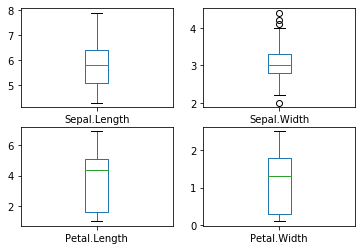

In [60]:
#Box plot 
#Sharex and Sharey- each of subplot x and y axis is independent
#df.plot(kind='box',subplots=True,layout=(2,2),sharex=True, sharey=False)

df.plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False)
plt.show()

In [53]:
#outliers can only be seen in the Sepal_width attribute.

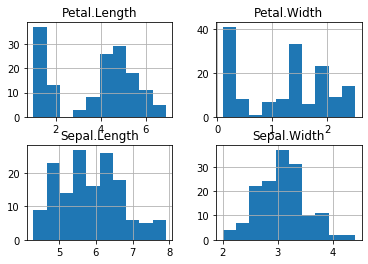

In [59]:
#Histograms - Give an idea about the distribution
df.hist()
plt.show()

In [55]:
#There is no bell shape curve in each of attributes among four. 
#There fore it can be concluded that there is no normal distribution in data.

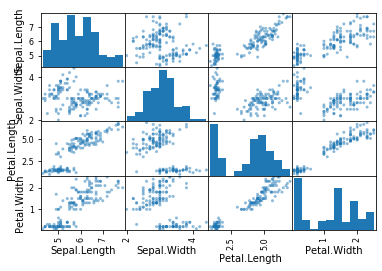

In [58]:
#Multivariate plots
#This can be used to recognize the interaction between attributes/variables
#Scatterplot

scatter_matrix(df)
plt.show()

In [61]:
#there are some diagonal grouping of attributes. 
#This gives the clue of high correlation and predictable stregth. 
#Correaltion means the strength of relationship between two attributs or variables.
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [62]:
#the correalation value 1- exact linear positive relationship
#-1-exact linear negative relationship
#0-+1/-1- there is a relationship, but all data are not fall in a line.failrly linear relationship.

In [63]:
#Evaluation of algorithms
#create validation data set
"""We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. 
We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and
we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that,
we will hold back as a validation dataset."""


'We need to know that the model we created is any good.\n\nLater, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. \nWe also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.\n\nThat is, we are going to hold back some data that the algorithms will not get to see and\nwe will use this data to get a second and independent idea of how accurate the best model might actually be.\n\nWe will split the loaded dataset into two, 80% of which we will use to train our models and 20% that,\nwe will hold back as a validation dataset.'

In [64]:
# Split-out validation dataset
array = df.values

In [65]:
#X array - consists of all rows and first four columns which express the training variables.
#Y array -consists of all rows and last column which express the target variable
X = array[:,0:4]
Y = array[:,4]

In [66]:
#Select 20% for the validation, validation_size selects upon that
validation_size = 0.20
seed = 7

In [67]:
#Split the data set as training model and test model,random_state-specific set of random numbers generated.
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [68]:
#training data in the X_train and Y_train for preparing models
#X_validation and Y_validation sets to validate the model

In [69]:
#Test Harness
#10-fold cross validation to estimate accuracy.
#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [70]:
#the metric of ‘accuracy‘ to evaluate models.
#This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate).
#We will be using the scoring variable when we run build and evaluate each model next.

In [71]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [73]:
#Build Models:
#Do not have any idea to which model is good or which configurations to use.
#some of the classes are partially linearly separable in some dimensions,
#evaluate 6 different algorithms:
      #Logistic Regression (LR)
      #Linear Discriminant Analysis (LDA)
      #K-Nearest Neighbors (KNN).
      #Classification and Regression Trees (CART).
      #Gaussian Naive Bayes (NB).
      #Support Vector Machines (SVM).""""""
#good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms
#reset the random number seed before each run to ensure that 
#the evaluation of each algorithm is performed using exactly the same data splits
#ensures the results are directly comparable.


In [74]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


In [76]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [77]:
#Support Vector Machines (SVM) has the largest estimated accuracy score (99.16%)

In [78]:
#create a plot of the model evaluation results and compare the spread and the mean accuracy of each model.
#population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

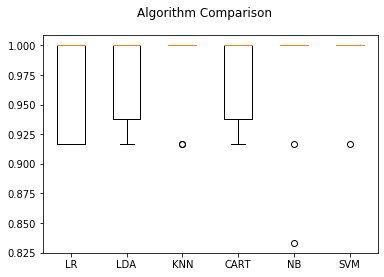

In [79]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [80]:
#the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

In [81]:
#Make predictions using KNN algorithm
#KNN algorithm is very simple and was an accurate model based on our tests
#get an idea of the accuracy of the model on our validation set.
#an independent final check on the accuracy of the best model.
#It is valuable to keep a validation set just in case you made a slip during training, 
#such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.
#run the KNN model directly on the validation set and summarize the results as a final accuracy score, 
#a confusion matrix and a classification report.


In [82]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
#The accuracy is 90%.

In [83]:
#classification accuracy = correct predictions / total predictions
#classification accuracy = correct predictions / total predictions * 100
#error rate = (1 - (correct predictions / total predictions)) * 100


In [84]:
#A confusion matrix is a summary of prediction results on a classification problem
#The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

In [ ]:
"""How to Calculate a Confusion Matrix
Below is the process for calculating a confusion Matrix.

You need a test dataset or a validation dataset with expected outcome values.
Make a prediction for each row in your test dataset.
From the expected outcomes and predictions count:
The number of correct predictions for each class.
The number of incorrect predictions for each class, organized by the class that was predicted.
These numbers are then organized into a table, or a matrix as follows:

Expected down the side: Each row of the matrix corresponds to a predicted class.
Predicted across the top: Each column of the matrix corresponds to an actual class."""